# Hello!! :)

In [76]:
import gudhi #### TDA package
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from itertools import combinations
import numpy as np
import pandas as pd
import os
from scipy.spatial import Delaunay
from matplotlib.collections import LineCollection, PolyCollection
from gudhi.hera import wasserstein_distance
import itertools

## Below are the code for part i

In [24]:
def generate_noisy_circle(n=200, radius=1, center=(0, 0), noise_std=0.1):
    theta = np.random.uniform(0.0, 2.0 * np.pi, size=n)
    ux = np.cos(theta)
    uy = np.sin(theta)
    cx, cy = center
    base = np.column_stack([cx + radius * ux, cy + radius * uy])
    noise = np.random.rand(n,2)
    points = base + noise_std*radius*noise
    return points

def generate_concentric_noisy_circle(n=200, radius1=1, radius2=2, center=(0, 0), noise_std=0.1):
    points1 = generate_noisy_circle(n//2, radius1, center, noise_std)
    points2 = generate_noisy_circle(n//2, radius2, center, noise_std)
    points = np.vstack([points1, points2])
    return points

def generate_offset_noisy_circle(n=200, radius=1, dist=1, center=(0, 0), noise_std=0.1):
    cx, cy = center
    center1 = (cx - dist/2 - radius, cy)
    points1 = generate_noisy_circle(n//2, radius, center1, noise_std)
    center2 = (cx + dist/2 + radius, cy)
    points2 = generate_noisy_circle(n//2, radius, center2, noise_std)
    points = np.vstack([points1, points2])
    return points

def generate_adjacent_noisy_circle(n=200, radius=1, noise_std=0.1):
    return generate_offset_noisy_circle(n, radius, 0, (0, 0), noise_std)

def generate_datasets(noise_std=0.1):
    concentric_dataset = [generate_concentric_noisy_circle(noise_std=noise_std) for i in range(100)]
    disjoint_dataset = [generate_offset_noisy_circle(noise_std=noise_std) for i in range(100)]
    adjacent_dataset = [generate_adjacent_noisy_circle(noise_std=noise_std) for i in range(100)]

    dataset = {
        'concentric': concentric_dataset,
        'disjoint': disjoint_dataset,
        'adjacent': adjacent_dataset
    }

    print("Dataset generated successfully!")
    #print(f"Total point clouds: {len(concentric_dataset) + len(disjoint_dataset) + len(adjacent_dataset)}")
    #print(f"Points per cloud: 200")
    return dataset

def plot_point_cloud(dataset):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot concentric circles
    axes[0].scatter(dataset['concentric'][0][:, 0], dataset['concentric'][0][:, 1], s=20, alpha=0.6)
    axes[0].set_title('Concentric Circles')
    axes[0].set_aspect('equal')
    axes[0].grid(True, alpha=0.3)

    # Plot disjoint circles
    axes[1].scatter(dataset['disjoint'][0][:, 0], dataset['disjoint'][0][:, 1], s=20, alpha=0.6)
    axes[1].set_title('Disjoint Circles')
    axes[1].set_aspect('equal')
    axes[1].grid(True, alpha=0.3)

    # Plot adjacent circles
    axes[2].scatter(dataset['adjacent'][0][:, 0], dataset['adjacent'][0][:, 1], s=20, alpha=0.6)
    axes[2].set_title('Adjacent Circles')
    axes[2].set_aspect('equal')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

## Below are code for Part ii

In [58]:
def compute_PH(points, title="Point Cloud"):
    alpha_complex = gudhi.AlphaComplex(points=points)
    st_a = alpha_complex.create_simplex_tree()
    st_a.compute_persistence()
    PH_alpha = st_a.persistence()
    return PH_alpha

def show_barcode_and_diagram(PH, title="Point Cloud"):
    show_barcode(PH, title=title)
    show_diagram(PH, title=title)

def show_barcode(PH, title="Point Cloud"):
    ax = gudhi.plot_persistence_barcode(PH, legend=True)
    ax.set_title("Alpha Complex Persistence Barcode for " + title)
    plt.show()

def show_diagram(PH, title="Point Cloud"):
    ax = gudhi.plot_persistence_diagram(PH, legend=True)
    ax.set_title("Alpha Complex Persistence Diagram for " + title)
    plt.show()

def diagram_from_PH(PH, dim=1, title="Point Cloud"):
    bars = [bar for bar in PH if bar[0] == dim]
    diag = np.array([el[1] for el in bars])
    return diag


def wasserstein_dist(diag1, diag2, order=2., internal_p=2.):
    dist = wasserstein_distance(diag1, diag2, order=order, internal_p=internal_p)
    return dist

In [65]:
def average_wasserstein_distance(dataset1, dataset2, dim=1):
    total_dist = 0
    total_pairs = 0
    maximum_dist = 0
    n = len(dataset1)
    for i in range(n):
        PH1 = compute_PH(dataset1[i])
        PH2 = compute_PH(dataset2[i-1])
        diag1 = diagram_from_PH(PH1, dim=dim)
        diag2 = diagram_from_PH(PH2, dim=dim)
        dist = wasserstein_dist(diag1, diag2)
        total_dist += dist
        total_pairs += 1
        if dist > maximum_dist:
            maximum_dist = dist
    avg_dist = total_dist / total_pairs
    return avg_dist, maximum_dist

## Run part i and part ii

Dataset generated successfully!


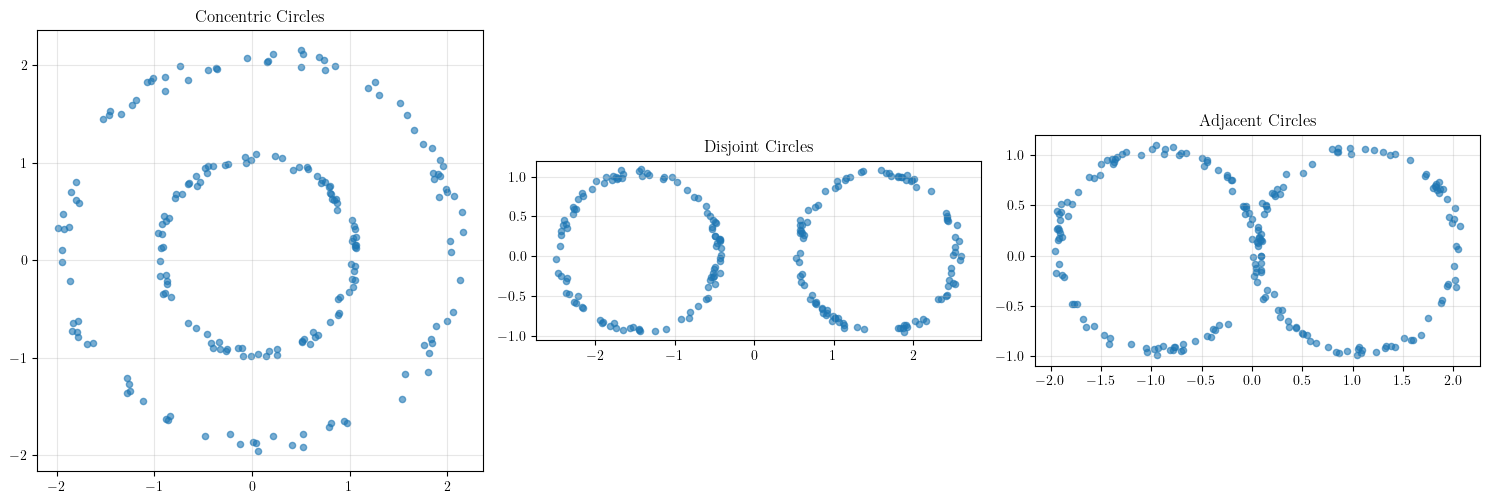

In [59]:
dataset = generate_datasets()
plot_point_cloud(dataset)

Here are the examples of one barcode for each class of point clouds

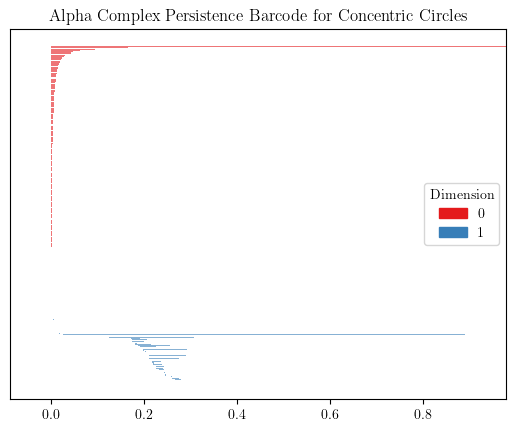

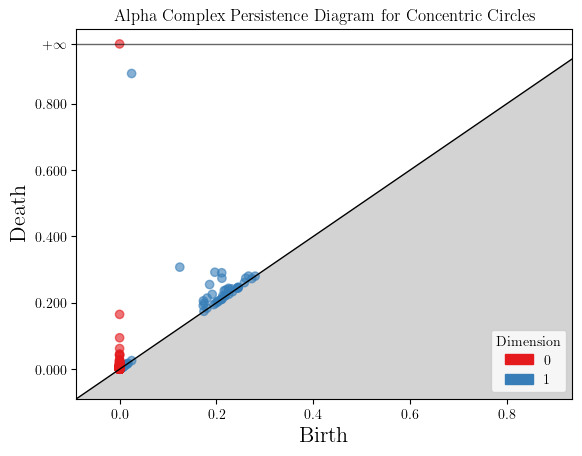

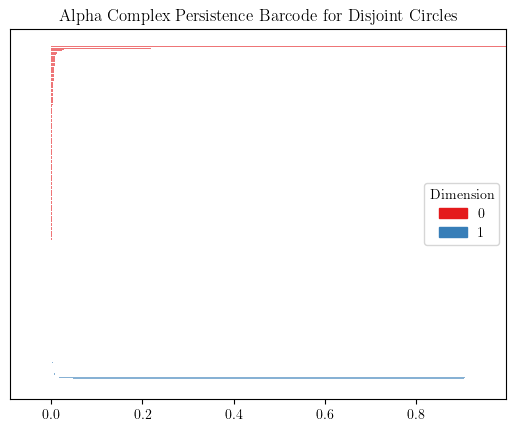

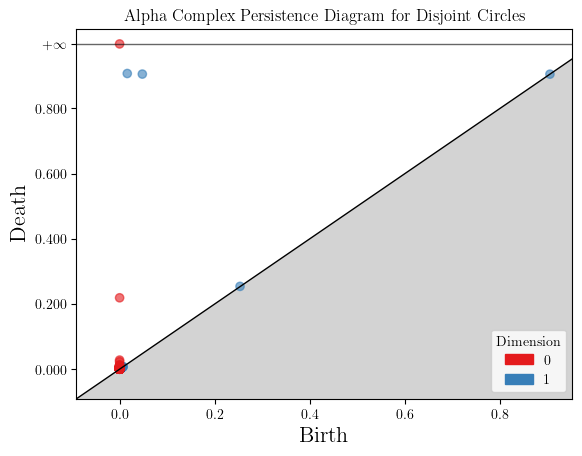

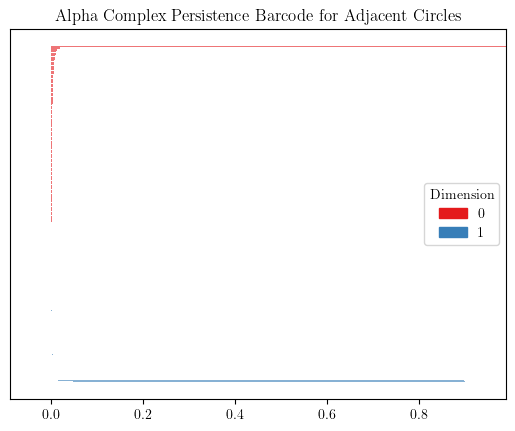

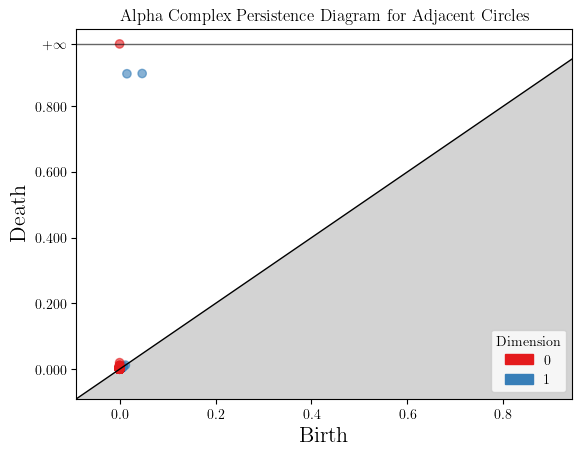

--- Computing Dimension 1 Wasserstein distances ---
Dimension 1 Wasserstein distance between Concentric and Disjoint circles: 0.6153370759977244
Dimension 1 Wasserstein distance between Concentric and Adjacent circles: 0.6097758586079551
Dimension 1 Wasserstein distance between Disjoint and Adjacent circles: 0.010229428629786182
--- Computing Dimension 0 Wasserstein distances ---
Dimension 0 Wasserstein distance between Concentric and Disjoint circles: 0.11394207673853994
Dimension 0 Wasserstein distance between Concentric and Adjacent circles: 0.15702555643454408
Dimension 0 Wasserstein distance between Disjoint and Adjacent circles: 0.1554634620512775


In [60]:
PH1 = compute_PH(dataset['concentric'][0], title="Concentric Circles")
PH2 = compute_PH(dataset['disjoint'][0], title="Disjoint Circles")
PH3 = compute_PH(dataset['adjacent'][0], title="Adjacent Circles")

show_barcode_and_diagram(PH1, title="Concentric Circles")
show_barcode_and_diagram(PH2, title="Disjoint Circles")
show_barcode_and_diagram(PH3, title="Adjacent Circles")

print("--- Computing Dimension 1 Wasserstein distances ---")

diag1 = diagram_from_PH(PH1, dim=1, title="Concentric Circles")
diag2 = diagram_from_PH(PH2, dim=1, title="Disjoint Circles")
diag3 = diagram_from_PH(PH3, dim=1, title="Adjacent Circles")

d12 = wasserstein_dist(diag1, diag2)
d13 = wasserstein_dist(diag1, diag3)
d23 = wasserstein_dist(diag2, diag3)

print(f"Dimension 1 Wasserstein distance between Concentric and Disjoint circles: {d12}")
print(f"Dimension 1 Wasserstein distance between Concentric and Adjacent circles: {d13}")
print(f"Dimension 1 Wasserstein distance between Disjoint and Adjacent circles: {d23}")

print("--- Computing Dimension 0 Wasserstein distances ---")

diag1 = diagram_from_PH(PH1, dim=0, title="Concentric Circles")
diag2 = diagram_from_PH(PH2, dim=0, title="Disjoint Circles")
diag3 = diagram_from_PH(PH3, dim=0, title="Adjacent Circles")

d12 = wasserstein_dist(diag1, diag2)
d13 = wasserstein_dist(diag1, diag3)
d23 = wasserstein_dist(diag2, diag3)

print(f"Dimension 0 Wasserstein distance between Concentric and Disjoint circles: {d12}")
print(f"Dimension 0 Wasserstein distance between Concentric and Adjacent circles: {d13}")
print(f"Dimension 0 Wasserstein distance between Disjoint and Adjacent circles: {d23}")

The main difference that we can tell Concentric Circles apart from the other two is that there is only one long interval in the dimension 1 barcode and there are also more smaller intervals in dimension 1, I think it is because the radius of the bigger circle is larger than the others which causing the points on the large circle mpre sparse.

The main difference that we can tell Disjoint circles and Adjacent circles is in dimension 0 barcode there are 2 longer intervals in disjoint circles while there is only one in Adjacent circles.

So we can read these off from Wasserstein distances: 
- There is longer dimension 1 Wasserstein distances between concentric circles and the others.
- There is longer dimension 0 Wasserstein distances between disjoint circles and adjacent circles.

Now we may compute the average and maximum distances between and within datasets. (It is too expensive to compute all possible pairs so I paired up the point clouds that indices are off by 1)

In [66]:
for dim in [0,1]:
    avg_aa, max_aa = average_wasserstein_distance(dataset['concentric'], dataset['concentric'], dim=dim)
    print(f"Dimension {dim} Average Wasserstein distance within Concentric circles: {avg_aa}, Maximum: {max_aa}")

    avg_bb, max_bb = average_wasserstein_distance(dataset['disjoint'], dataset['disjoint'], dim=dim)
    print(f"Dimension {dim} Average Wasserstein distance within Disjoint circles: {avg_bb}, Maximum: {max_bb}")

    avg_cc, max_cc = average_wasserstein_distance(dataset['adjacent'], dataset['adjacent'], dim=dim)
    print(f"Dimension {dim} Average Wasserstein distance within Adjacent circles: {avg_cc}, Maximum: {max_cc}")

    avg_cd, max_cd = average_wasserstein_distance(dataset['concentric'], dataset['disjoint'], dim=dim)
    print(f"Dimension {dim} Average Wasserstein distance between Concentric and Disjoint circles: {avg_cd}, Maximum: {max_cd}")

    avg_ca, max_ca = average_wasserstein_distance(dataset['concentric'], dataset['adjacent'], dim=dim)
    print(f"Dimension {dim} Average Wasserstein distance between Concentric and Adjacent circles: {avg_ca}, Maximum: {max_ca}")

    avg_da, max_da = average_wasserstein_distance(dataset['disjoint'], dataset['adjacent'], dim=dim)
    print(f"Dimension {dim} Average Wasserstein distance between Disjoint and Adjacent circles: {avg_da}, Maximum: {max_da}")

Dimension 0 Average Wasserstein distance within Concentric circles: 0.046698263591981516, Maximum: 0.12392237439973298
Dimension 0 Average Wasserstein distance within Disjoint circles: 0.017927116333494447, Maximum: 0.03801939203603406
Dimension 0 Average Wasserstein distance within Adjacent circles: 0.010929719017546684, Maximum: 0.027906592223952878
Dimension 0 Average Wasserstein distance between Concentric and Disjoint circles: 0.1141018585810577, Maximum: 0.16494962383626338
Dimension 0 Average Wasserstein distance between Concentric and Adjacent circles: 0.15101683088209866, Maximum: 0.18872995214429106
Dimension 0 Average Wasserstein distance between Disjoint and Adjacent circles: 0.15826678318448953, Maximum: 0.18089989957226865
Dimension 1 Average Wasserstein distance within Concentric circles: 0.08941966110967345, Maximum: 0.1736375554633632
Dimension 1 Average Wasserstein distance within Disjoint circles: 0.025657436444232726, Maximum: 0.07876505709497726
Dimension 1 Average

Just as expected we can tell concentric circles apart from the other two from Dimension 1 Wasserstein distance (0.6 avg vs 0.1 max) and we can tell Disjoint and Adjacent circles apart by looking at Dimension 0 Wasserstein distance (0.15 avg vs 0.04 max).

If we want to classify one point cloud we may choose to compute the average Wasserstein distance to our known datasets and then compare the distance to draw our conclusion.

If I had the time it would be great if I can try point clouds with different radius so that we can kind of control the density of points in the larger circle so that the concentrated circles dataset behave better but unfortunately I don't have enough time.. :(

## Run part iii

Dataset generated successfully!


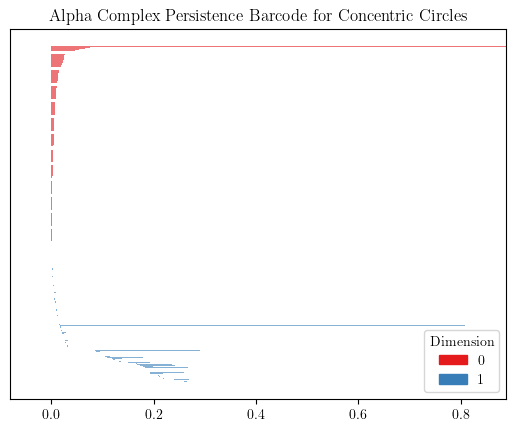

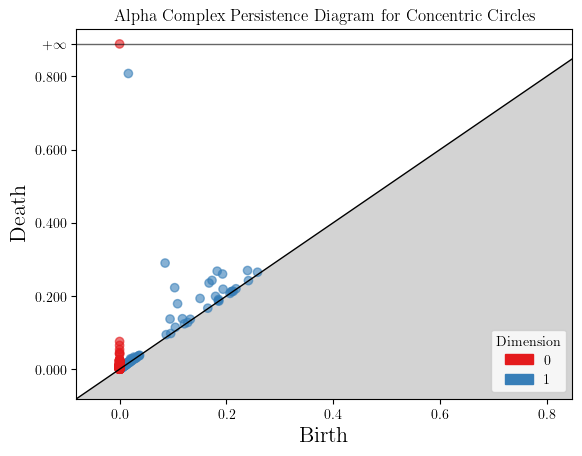

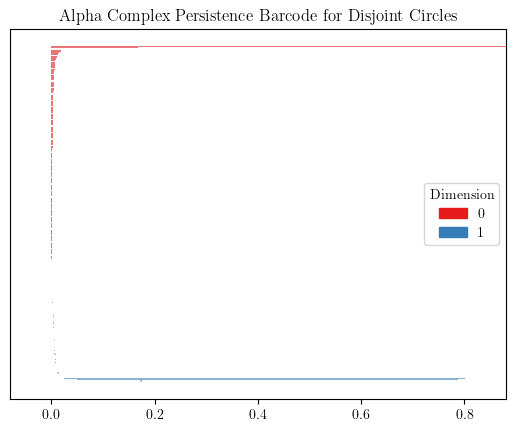

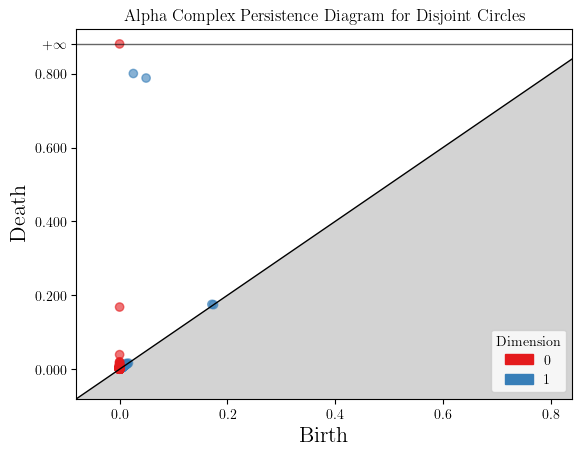

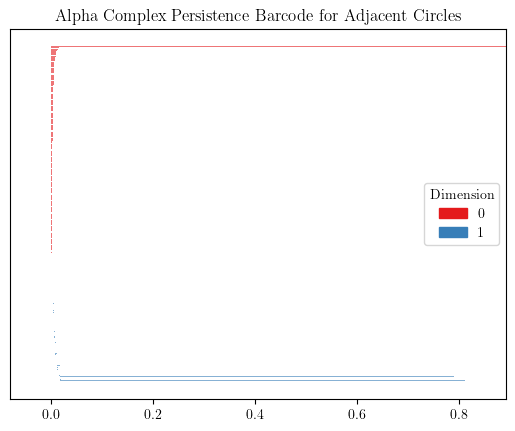

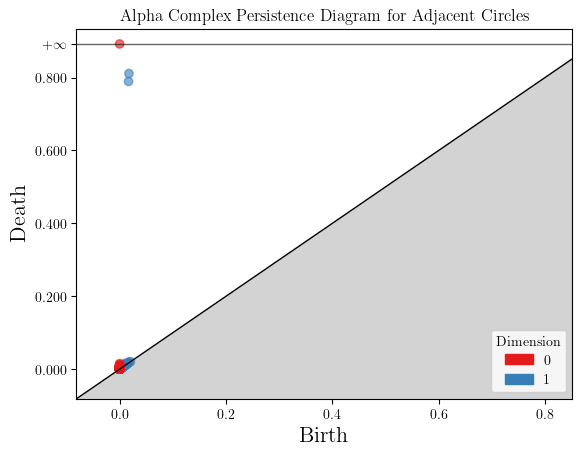

In [68]:
dataset02 = generate_datasets(noise_std=0.2)
PH1 = compute_PH(dataset02['concentric'][0], title="Concentric Circles")
PH2 = compute_PH(dataset02['disjoint'][0], title="Disjoint Circles")
PH3 = compute_PH(dataset02['adjacent'][0], title="Adjacent Circles")

show_barcode_and_diagram(PH1, title="Concentric Circles")
show_barcode_and_diagram(PH2, title="Disjoint Circles")
show_barcode_and_diagram(PH3, title="Adjacent Circles")

Dataset generated successfully!


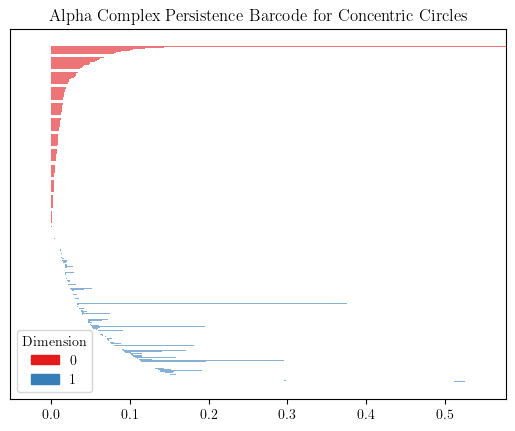

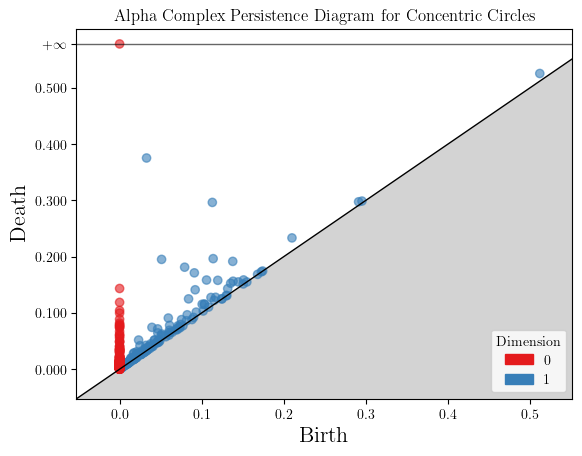

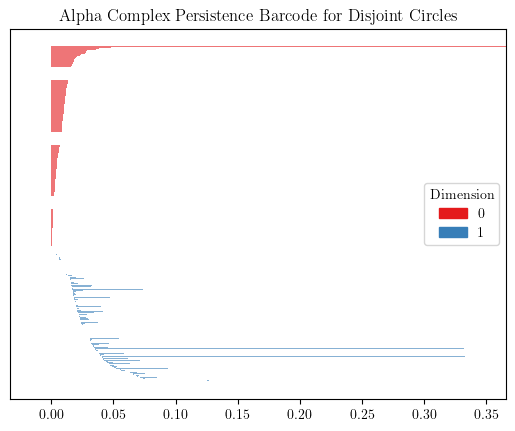

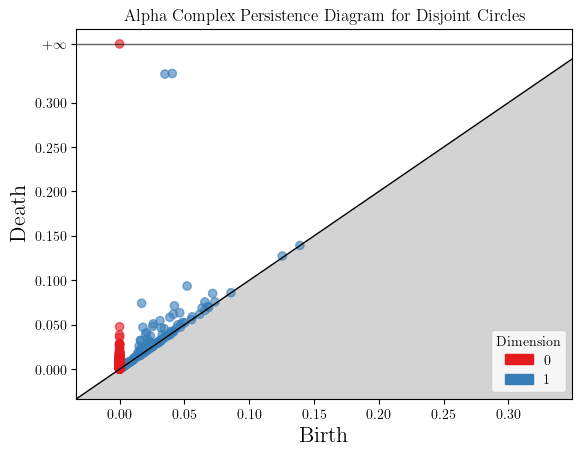

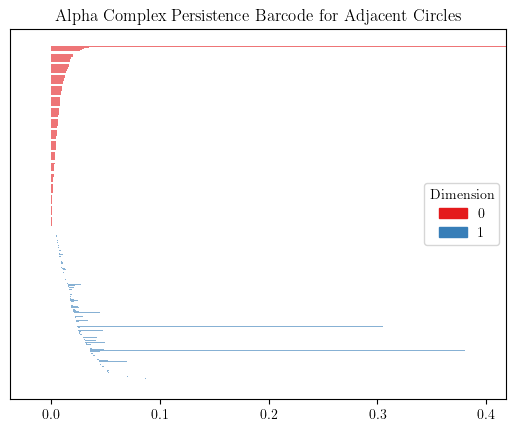

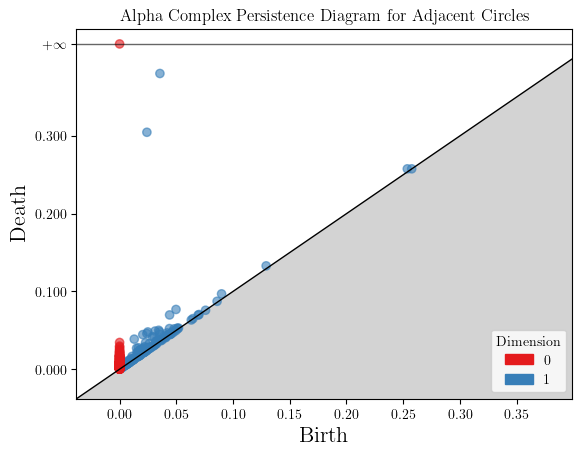

In [69]:
dataset08 = generate_datasets(noise_std=0.8)

PH1 = compute_PH(dataset08['concentric'][0], title="Concentric Circles")
PH2 = compute_PH(dataset08['disjoint'][0], title="Disjoint Circles")
PH3 = compute_PH(dataset08['adjacent'][0], title="Adjacent Circles")

show_barcode_and_diagram(PH1, title="Concentric Circles")
show_barcode_and_diagram(PH2, title="Disjoint Circles")
show_barcode_and_diagram(PH3, title="Adjacent Circles")

Dataset generated successfully!


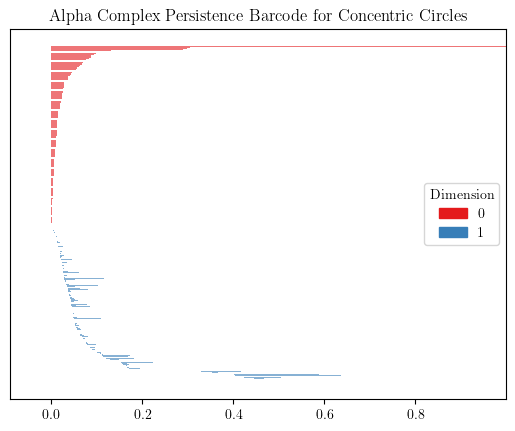

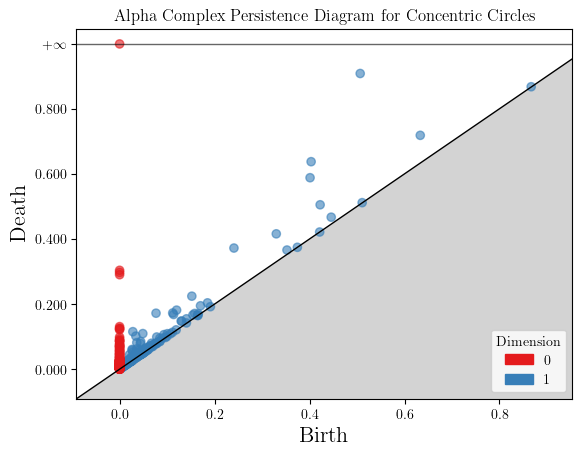

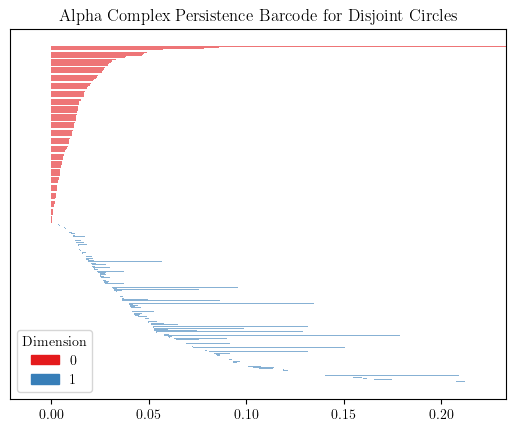

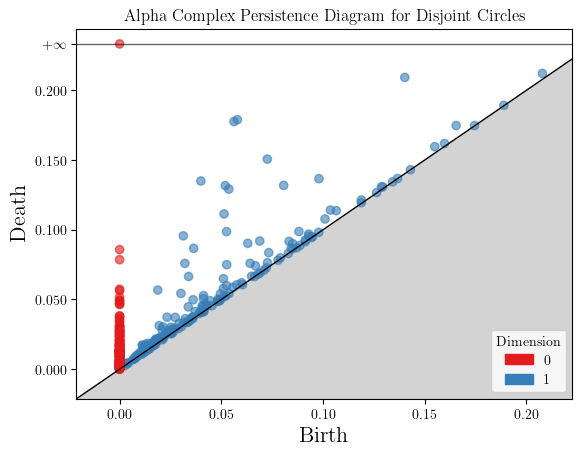

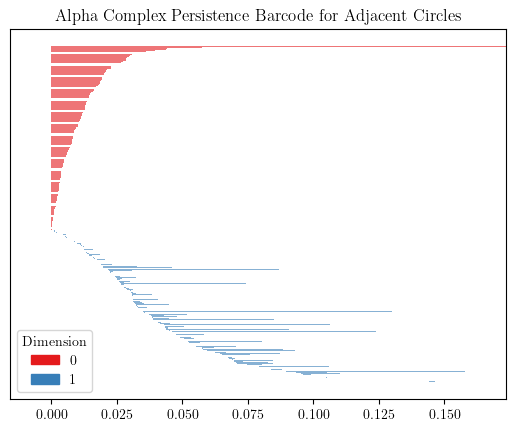

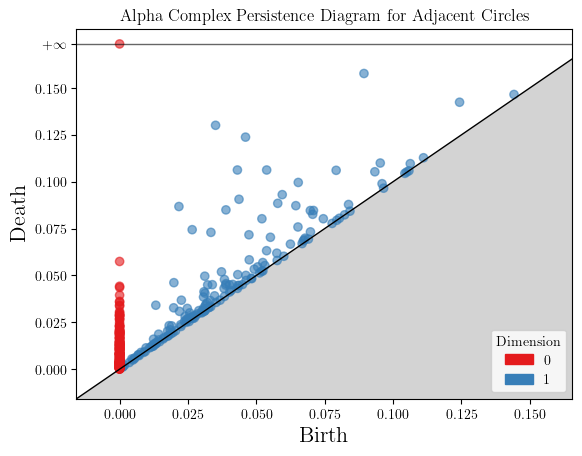

In [70]:
dataset15 = generate_datasets(noise_std=1.5)

PH1 = compute_PH(dataset15['concentric'][0], title="Concentric Circles")
PH2 = compute_PH(dataset15['disjoint'][0], title="Disjoint Circles")
PH3 = compute_PH(dataset15['adjacent'][0], title="Adjacent Circles")

show_barcode_and_diagram(PH1, title="Concentric Circles")
show_barcode_and_diagram(PH2, title="Disjoint Circles")
show_barcode_and_diagram(PH3, title="Adjacent Circles")

Dataset generated successfully!


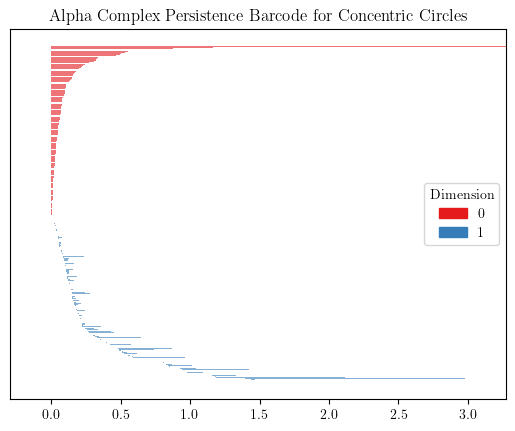

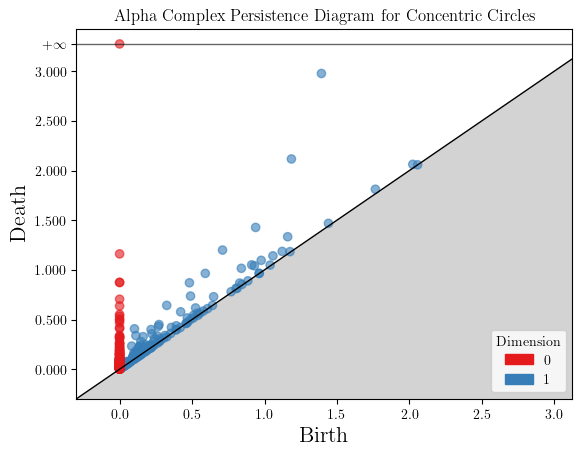

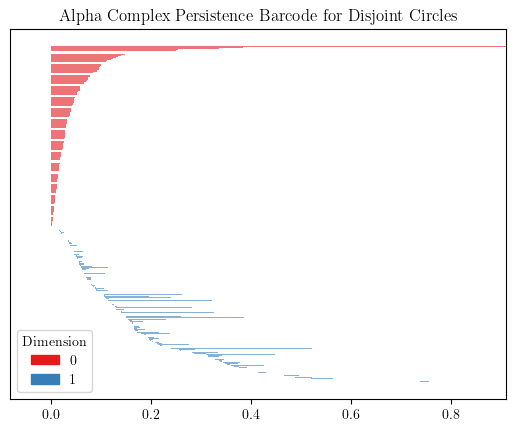

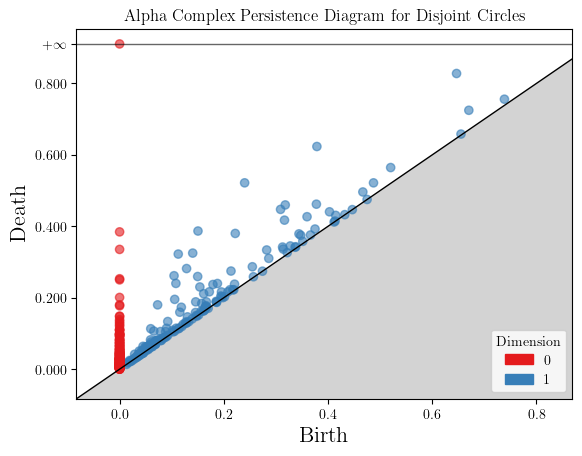

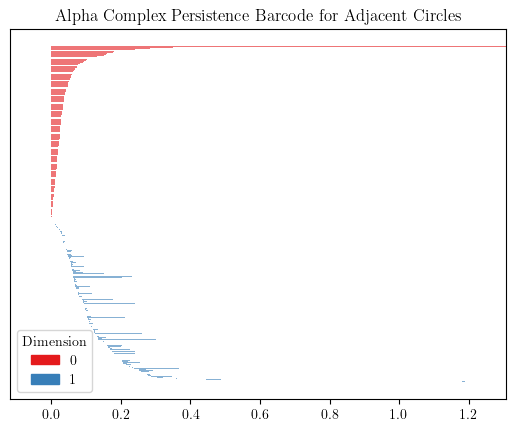

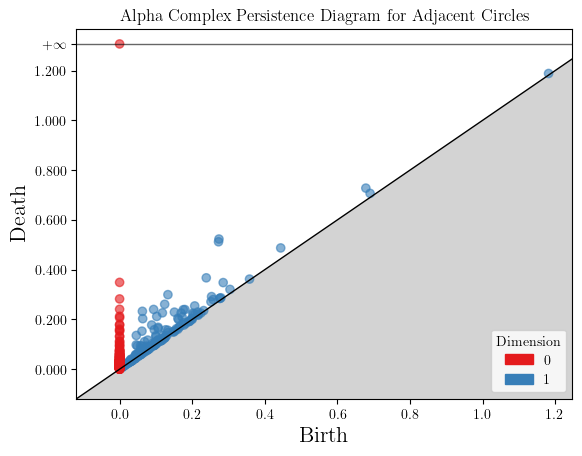

In [71]:
dataset50 = generate_datasets(noise_std=5)

PH1 = compute_PH(dataset50['concentric'][0], title="Concentric Circles")
PH2 = compute_PH(dataset50['disjoint'][0], title="Disjoint Circles")
PH3 = compute_PH(dataset50['adjacent'][0], title="Adjacent Circles")

show_barcode_and_diagram(PH1, title="Concentric Circles")
show_barcode_and_diagram(PH2, title="Disjoint Circles")
show_barcode_and_diagram(PH3, title="Adjacent Circles")

We may compute the Wasserstein distance for different noise level:

In [82]:
dict_dataset = {
    0.2: dataset02,
    0.8: dataset08,
    1.5: dataset15,
    5: dataset50
}

for noise1,noise2 in list(itertools.product([0.2, 0.8, 1.5, 5], repeat=2)):
    if noise1 > noise2:
        continue
    for type in ['concentric', 'disjoint', 'adjacent']:
        dataset1 = dict_dataset[noise1][type]
        dataset2 = dict_dataset[noise2][type]
        for dim in [0,1]:
            PH1 = compute_PH(dataset1[0])
            PH2 = compute_PH(dataset2[1])
            diag1 = diagram_from_PH(PH1, dim=dim)
            diag2 = diagram_from_PH(PH2, dim=dim)
            dist = wasserstein_dist(diag1, diag2)
            print(f"Wasserstein distance (dim {dim}) between {type} dataset with noise std {noise1} and {type} dataset with noise std {noise2}: {dist}")

    '''for type1,type2 in list(itertools.combinations(['concentric', 'disjoint', 'adjacent'], 2)):
        dataset1 = dict_dataset[noise1][type1]
        dataset2 = dict_dataset[noise2][type2]
        for dim in [0,1]:
            PH1 = compute_PH(dataset1[0])
            PH2 = compute_PH(dataset2[0])
            diag1 = diagram_from_PH(PH1, dim=dim)
            diag2 = diagram_from_PH(PH2, dim=dim)
            dist = wasserstein_dist(diag1, diag2)
            print(f"Wasserstein distance (dim {dim}) between {type1} dataset with noise std {noise1} and {type2} dataset with noise std {noise2}: {dist}")'''

Wasserstein distance (dim 0) between concentric dataset with noise std 0.2 and concentric dataset with noise std 0.2: 0.03219064444724744
Wasserstein distance (dim 1) between concentric dataset with noise std 0.2 and concentric dataset with noise std 0.2: 0.08007930091022016
Wasserstein distance (dim 0) between disjoint dataset with noise std 0.2 and disjoint dataset with noise std 0.2: 0.0318536811051494
Wasserstein distance (dim 1) between disjoint dataset with noise std 0.2 and disjoint dataset with noise std 0.2: 0.036281430597958235
Wasserstein distance (dim 0) between adjacent dataset with noise std 0.2 and adjacent dataset with noise std 0.2: 0.012786886840921226
Wasserstein distance (dim 1) between adjacent dataset with noise std 0.2 and adjacent dataset with noise std 0.2: 0.02137770593901573
Wasserstein distance (dim 0) between concentric dataset with noise std 0.2 and concentric dataset with noise std 0.8: 0.2240166483699286
Wasserstein distance (dim 1) between concentric da

We can see if we increase the noise, then more smaller intervals in dimension 1 barcode are generated and Wasserstein distance between point clouds are becoming larger.

Note: It would be probably better if we can generate these using a loop and put all the barcode together and compare.